<a href="https://colab.research.google.com/github/gigatesseract/KPMatch/blob/master/KeyPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Idea    
* Find (k) keypoints    (k) is set to maximum for now
* Apply a transformation from bounding box in template to bounding box in source    
* If the keypoint mapping is scattered, then the transformed bounding box will also be not proper    
* Check the fraction of keypoints in source that is inside the bounding box    
* If that is greater than threshold, then flag the bounding box as correct    



#### Relevant links    



[Check if a point is inside a polygon](https://stackoverflow.com/questions/217578/how-can-i-determine-whether-a-2d-point-is-within-a-polygon)    
[Improve accuracy of homography function](https://stackoverflow.com/questions/19019726/how-to-improve-the-homography-accuracy)    
[ORB Detector](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html)    
[Brute-Force Matcher](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html)    



## Connect with google drive    
* Make sure the images are in your gooogle drive under "image/"    
* the crops are under "crops/"    
* Execute below code

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# %matplotlib inline      # required to draw inline plots (which is not working here, but worked in jupyter)
import numpy as np      # the library for numerical computation
import glob             # pathname mathcing according to unix shell
import cv2              # computer vision library
from matplotlib import pyplot as plt     # for drawing graphs
import json

In [0]:
#vertx : x vertices of the array
#verty : y vertices of the array

def pnpoly(n_vert, vertx, verty, testx, testy):
    i=0
    c = False
    j = n_vert-1
    while i < n_vert: 
        
        if ( ((verty[i]>testy) != (verty[j]>testy)) and (testx < (vertx[j]-vertx[i]) * (testy-verty[i]) / (verty[j]-verty[i]) + vertx[i]) ):
            if c==True:
              
                c = False
            else: c = True
        j = i
        i+=1
    
    return c


In [0]:
# runs pnpoly for each poiint and returns true if fraction of matches is greater than threshold

def isInside(points, x_vertices, y_vertices, x_test, y_test, threshold,):
    total_count=0
    count=0
    
    for i in range(len(x_test)):
        if pnpoly(4, x_vertices, y_vertices, x_test[i], y_test[i]):
            count+=1
        total_count+=1
    
    if count/total_count>=threshold:
        return True;
    return False
            
        
    

In [4]:
pnpoly(4, [0, 10,10, 0], [0, 0, 10, 10], 8,9)    # Checks if the point (8,9) is in the quadrilateral described by (0,0), (10,0), (10,10), (0,10)

True

heool
heoool
Number of matches for template MSD/crops/15f1b64d-d7d1-4733-8ddb-509931430ce2.jpg with threshhold 0.9:  0
heoool


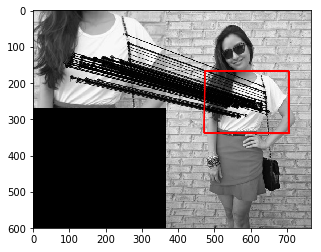

Number of matches for template MSD/crops/feline.jpg with threshhold 0.9:  1
heoool


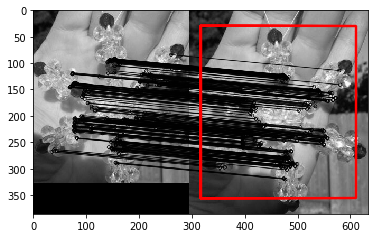

Number of matches for template MSD/crops/4bf6219c-79e2-47e9-a895-048ab402ca68.jpg with threshhold 0.9:  1
heoool


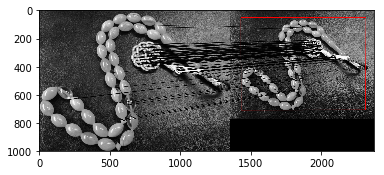

Number of matches for template MSD/crops/97857e0d-ac75-44bf-8ca8-f569a18c8621.jpg with threshhold 0.9:  1
heoool
Number of matches for template MSD/crops/59a25e19-6038-4387-8e65-133e04e44aeb.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/ea405815-9a56-4509-b284-467e104226f0.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/972ed3f3-4b7b-430a-946f-1995d58923c6.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/f9b26120-3b13-4ba5-9f2b-66e1eab11e68.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/8324c118-7bff-4ec4-87f6-dedd3db04de2.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/7d388526-2139-4dff-8fd9-c740798cd489.jpg with threshhold 0.9:  0
heoool


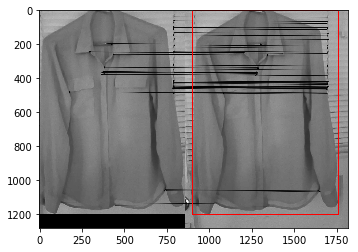

Number of matches for template MSD/crops/de27f272-0ab8-46e4-af30-a6f3d6066d3c.jpg with threshhold 0.9:  1
heoool
Number of matches for template MSD/crops/ae45044e-495a-4d98-a1f6-41722b0926d9.jpg with threshhold 0.9:  0
heoool


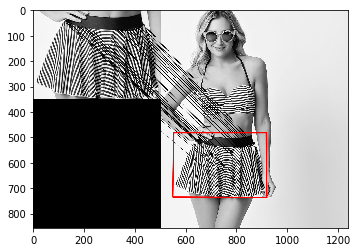

Number of matches for template MSD/crops/b580ab25-a459-4399-b16c-d6d6acfd73a2.jpg with threshhold 0.9:  1
heoool
Number of matches for template MSD/crops/6f0c977e-742f-4852-afd1-ae1d752b3aa8.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/15efa493-c93d-4e63-8f86-0d28a453df7b.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/e9919e1d-dede-4432-a5cb-dd35fd0b0f78.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/a70066dd-9a6d-4f5c-a17c-20df91da8c0f.jpg with threshhold 0.9:  0
heoool


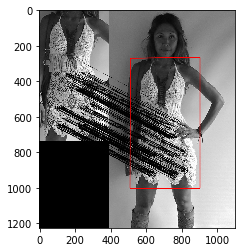

Number of matches for template MSD/crops/4e3ba8db-e9b0-484c-ab40-b098b98a6b66.jpg with threshhold 0.9:  1
heoool
Number of matches for template MSD/crops/0d4d4a81-00de-4971-9e90-64efd4f90fa0.jpg with threshhold 0.9:  0
heoool


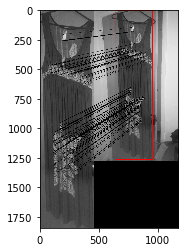

Number of matches for template MSD/crops/60241feb-3652-4e45-a272-ebd1f767793c.jpg with threshhold 0.9:  1
heoool
Number of matches for template MSD/crops/5e6f0327-6222-4ed8-9933-cee749129b1c.jpg with threshhold 0.9:  0
heoool


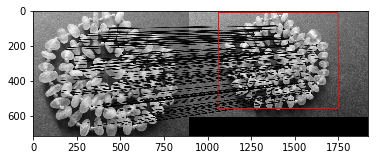

Number of matches for template MSD/crops/334ffe05-ff75-4a22-89c7-c27998b8ff79.jpg with threshhold 0.9:  1
heoool
Number of matches for template MSD/crops/58d898cd-52ab-4d40-bc1f-309c446f9dbd.jpg with threshhold 0.9:  0
heoool


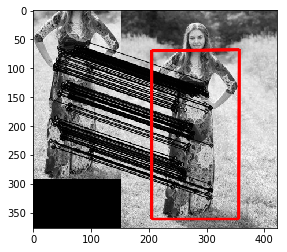

Number of matches for template MSD/crops/cde62b7e-6565-43d7-aeae-8880720277c4.jpg with threshhold 0.9:  1
heoool


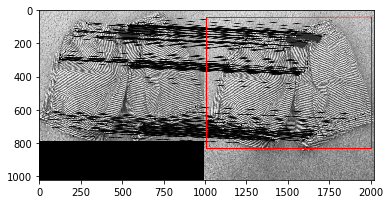

Number of matches for template MSD/crops/ffba28a6-60cd-4cd3-a06d-1cfa2d39d886.jpg with threshhold 0.9:  1
heoool
Number of matches for template MSD/crops/dfd402d9-bb96-4a93-aa40-92bd5dd93150.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/e1ff0c51-c03f-49cc-9eca-1b82dd109f3e.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/47fe55db-6cd0-444b-9493-569be43e2a3d.jpg with threshhold 0.9:  0
heoool
Number of matches for template MSD/crops/3562c986-5d2d-4db5-9769-90a24c6aa849.jpg with threshhold 0.9:  0
heoool


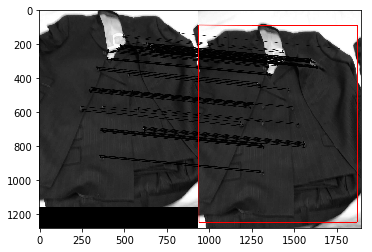

KeyboardInterrupt: ignored

In [5]:
print("heool")
for template in glob.glob("MSD/crops"+"/*.jpg"): 
    print("heoool")
    img1 = cv2.imread(template, 0)
    match=0 
                       # returns a cv2 image
    for imagePath in glob.glob("MSD/images" + "/*.jpg"): # returns jpg files in random order inside images folder

        img2 = cv2.imread(imagePath,0)
                                              # a match counter soleley for printing number of mathes in the end
#         print("Template: ", template)
#         print("Source: ", imagePath)   
       
                  
        

        orb = cv2.ORB_create()                      # It is an ORB keypoint detector (combinaion of FAST and BRIEF) (Tweak: try SIFT with sift = cv2.xfeatures2d.SIFT_create())

        kp1, des1 = orb.detectAndCompute(img1,None)   # Find keypoints and descrptors in the source image
        kp2, des2 = orb.detectAndCompute(img2,None)

        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)         #this is the bruteforce matcher (Tweak: try crossCheck = False)
        matches = bf.match(des1,des2)                   # matches descriptor1 with descriptor2 using brute force technique and returns an array of match for each feature

        
        matches = sorted(matches, key = lambda x:x.distance)   # sort by distance to get first (k) matches alone

        good_matches = matches[:]     # this is the matches, important. Tweak: good_matches = matches[:k])

        
        # each element in good_matches as queryindex, and TrainIndex as attributes, (queryIndex is the ith feature in template) trainIndex is the ith feature in source 
        # destination is the (source) xP
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches     ]).reshape(-1,1,2)   # ---> contains only those key points of template (coordinates) which are goood matches
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)      # ---> contains only those key points of source (coordinates) which are goood matches
#         print("src_pts: ", src_pts)
#         print("dst_pts: ", dst_pts)
        try:
          if(len(good_matches)>=130):
            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)      #these two lines involve so much math. M is the homography matrix ,
            # mask i have no freaking idea, but they both determine the orientation of the source image plane with respect to the template image plane
            matchesMask = mask.ravel().tolist()
            h,w = img1.shape[:2]
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

            dst = cv2.perspectiveTransform(pts,M)   # dst is pts array under the homography transformation, dst has 4 points that are transformed relative to pts

            # format of dst[]: 
            #         [[[123 456]
            #            [111 333].....]]
            x_vertices = dst[:,:,0].ravel().tolist()   # np_array.ravel() ---> Flattens nd array into a 1d np array  ---> the x vertices alone of the dst
            y_vertices = dst[:,:,1].ravel().tolist()   # np_array.tolist()-----> converts np array to python list    ---> the y-vertices alone of the dst

            x_test_vertices = dst_pts[:,:,0].ravel().tolist()   # ----> these are the key points in source image, x(coordinates alone)
            y_test_vertices = dst_pts[:,:,1].ravel().tolist()   # ----> these are the key points in source image, y(coordinates alone)

            draw_params = dict(matchColor = (1,1,1,1), # draw matches in green color   # drawing the keypoints
                               singlePointColor = None,
                               matchesMask = matchesMask, # draw only inliers
                               flags = 2)

            img3 = cv2.drawMatches(img1,kp1,img2,kp2,good_matches, None,**draw_params)    
            # THreshhold:- 0.5
            if isInside(dst_pts, x_vertices, y_vertices,x_test_vertices, y_test_vertices, 0.7):   #if the keypoints are inside the polygon...
                match+=1
                dst+=(w,0)
                img3 = cv2.polylines(img3, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)   # draw the dst for representation purposes
                imgrgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
    #             cv2.imshow('HelloWorld', img3)
    #             cv2.waitKey(0) 
    #             cv2.destroyWindow('HelloWorld')
                plt.imshow(imgrgb)
                plt.show()
        except:
          print("oopsey")
          continue
    
    print("Number of matches for template "+ template + " with threshhold " + str(threshold) +" : ", match)
        

### Errors and tweaks needed    

* File size is too small, findHomography fails     
(Sample file: 15f1b64d-d7d1-4733-8ddb-509931430ce2.jpg in crops)    
* Maximum number of matches leads to more processing, at the same time, less number of matches results sometimes in bounding box covering the entire picture, therefore all keypoints are inside the bounding box and therefore the picture is flagged as true, which is not correct. So an optimum value of matches is required

In [0]:
def keyPointDetector():
  keypointDetector = cv2.ORB_create() # FUTURE SCOPE: keypointDetector = cv2.xfeatures2d.SIFT_create())
  return keypointDetector

In [0]:
def json_dump(image_name, template_name, bounding_polygon, json_dict):
  bounding_polygon = bounding_polygon[:,:,:].ravel().tolist()
  coordinates = [bounding_polygon[0], bounding_polygon[1], bounding_polygon[4], bounding_polygon[5]]
  if image_name in json_dict:
    json_dict[image_name].append(tuple([template_name,coordinates] ))
  else:    
    json_dict[image_name]=list(tuple([template_name, coordinates]))
   


In [0]:
print(tuple(["123", ["nn"]]))

('123', ['nn'])


In [0]:
def add_na_image(image_name, json_dict):
  json_dict[image_name]=[]
  

In [0]:
def add_na_crop(available, found, json_dict):
  na_crops =  available.difference(found)
  na_array = []
  for crop in na_crops:
    crop_tuple = tuple([crop, []])
    na_array.append(crop_tuple)
  json_dict['na'] = na_array
    

In [0]:
def keypointmatch(source_path, template_path, threshold, no_good_matches,cross_check = True):
  json_output = {}
  count=0
  crop_set_found = set()
  crop_set_available = set()
  for imagePath in glob.glob(source_path + "/*.jpg"):
    match_flag = False
    count+=1
    if True or count<4:
      img2 = cv2.imread(imagePath, 0)
      match=0 # a match counter soleley for printing number of mathes in the end
      img_count=0                # returns a cv2 image
       # returns jpg files in random order inside images folder
      for template in glob.glob(template_path+"/*.jpg"): 
          crop_set_available.add(template)
          img_count+=1
          if True or img_count<20:
            img1 = cv2.imread(template,0)
                                                  
    

            orb = keyPointDetector()                     # It is an ORB keypoint detector (combinaion of FAST and BRIEF) (Tweak: try SIFT with sift = cv2.xfeatures2d.SIFT_create())

            kp1, des1 = orb.detectAndCompute(img1,None)   # Find keypoints and descrptors in the source image
            kp2, des2 = orb.detectAndCompute(img2,None)

            bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=cross_check)         
            matches = bf.match(des1,des2)                   
            matches = sorted(matches, key = lambda x:x.distance)  

            good_matches = matches[:]    
            src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)   
            dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2) 

            try:
              if(len(good_matches)>=no_good_matches):
                M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)      
                matchesMask = mask.ravel().tolist()
                h,w = img1.shape[:2]
                pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

                dst = cv2.perspectiveTransform(pts,M)   # dst is pts array under the homography transformation, dst has 4 points that are transformed relative to pts

               
                x_vertices = dst[:,:,0].ravel().tolist()   # np_array.ravel() ---> Flattens nd array into a 1d np array  ---> the x vertices alone of the dst
                y_vertices = dst[:,:,1].ravel().tolist()   # np_array.tolist()-----> converts np array to python list    ---> the y-vertices alone of the dst

                x_test_vertices = dst_pts[:,:,0].ravel().tolist()   # ----> these are the key points in source image, x(coordinates alone)
                y_test_vertices = dst_pts[:,:,1].ravel().tolist()   # ----> these are the key points in source image, y(coordinates alone)


                if isInside(dst_pts, x_vertices, y_vertices,x_test_vertices, y_test_vertices, threshold):   #if the keypoints are inside the polygon...
                    match_flag = True
                    json_dump(imagePath, template, dst[:,:,:], json_output)
                    crop_set_found.add(template)
            except:
              continue
      if match_flag:
        match_flag = False
      else:
        add_na_image(imagePath, json_output)

  add_na_crop(crop_set_available, crop_set_found, json_output)
  json_string = json.dumps(json_output)
  return json_output, json_string

In [0]:
json_output = {}

json_output, json_string = keypointmatch("MSD/images", "MSD/crops", 0.7, 80)

KeyboardInterrupt: ignored

In [0]:
 print(json_string)

{"na": []}


In [0]:
tuple("123")

('1', '2', '3')